# TD 2 | Analyse et visualisation de données avec numpy, pandas et matplotlib


Objectifs du TD :

* découvrir la visualisation de données avec matplotlib
* approfondir la maîtrise de numpy et pandas
* effectuer une première analyse exploratoire de données (EDA)
* découvrir la librairie de machine learning (ML) scikit-learn
* appliquer des techniques basiques d'apprentissage non supervisé pour visualiser et classifier des données (PCA, $k$-means)

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Ne pas modifier
vol = pd.read_csv("../data/Vol010.csv").drop(0).dropna(how='any').iloc[::10] # On ne garde qu'un point sur 10 pour limiter les points à affichervol
vol.index = np.arange(vol.shape[0])
vol['t'] = pd.to_datetime(vol['t'])
vol[vol.columns[1:]] = vol[vol.columns[1:]].apply(pd.to_numeric)
vol['FLIGHT_MOD'] = vol['FLIGHT_MOD'].apply(int)

In [3]:
print(vol.shape)
vol.head()

(2283, 26)


,t,EGT_SEL,FLIGHT_MOD,FMV_SEL,HPTC_SEL,LPTC_SEL,N1_SEL,N2_ACTSEL,OIL_P,OIL_TEMP,...,T25_SEL,T3_SEL,VBV_SEL,VIB_CN1,VIB_CN2,VIB_TN1,VIB_TN2,VSV_SEL,WFM_SEL,XM
0,2011-09-15 14:26:02.875,335.984000,1,0.0,0.0,0.0,0.0,0.0,0.000,177.3740,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7679.84,0.15
1,2011-09-15 14:26:05.375,72.000600,1,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15
2,2011-09-15 14:26:07.875,72.001100,1,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15
3,2011-09-15 14:26:10.375,527.978000,1,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10752.10,0.15
4,2011-09-15 14:26:12.875,-0.001335,1,0.0,0.0,0.0,0.0,0.0,456.002,44.6249,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15


In [4]:
import seaborn as sns

EXERCICE - Plot avec titres et légende

Explorez la documentation de pyplot pour ajouter au graphe :
1. Un titre à la figure
2. Des titres aux axes
3. Une légende

[Text(0.5, 1.0, 'Map des corrélations'),
 Text(0.5, 113.09375, 'Donnée'),
 Text(158.09375, 0.5, 'Donnée')]

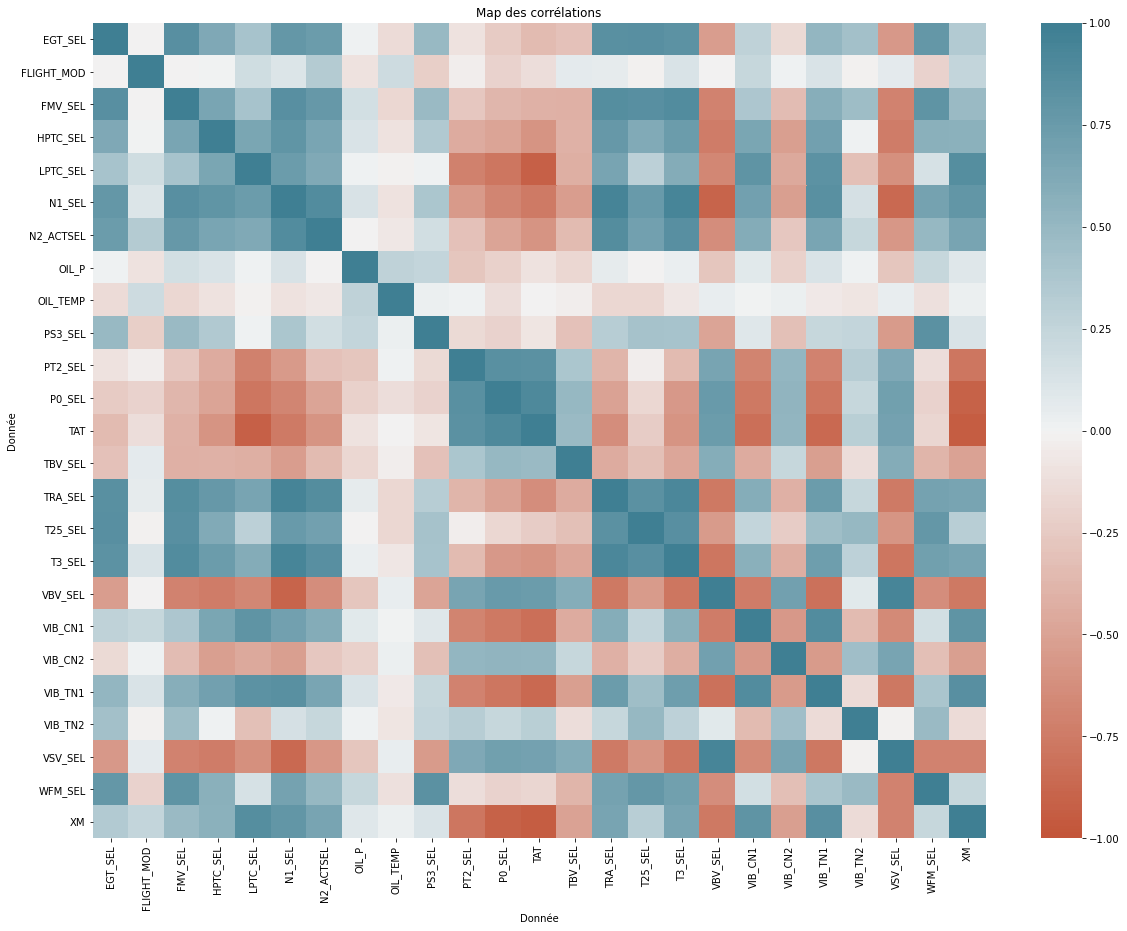

In [5]:
# calculate the correlation matrix
corr = vol.corr()

# plot the heatmap
fig = plt.figure(figsize=(20,15))

graph=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=False, fmt='.2f', vmin=-1, vmax=1, center=0, 
        cmap=sns.diverging_palette(20, 220, n=200))
graph.set(title='Map des corrélations',xlabel ="Donnée", ylabel ="Donnée")

# Essayer avec annot=True

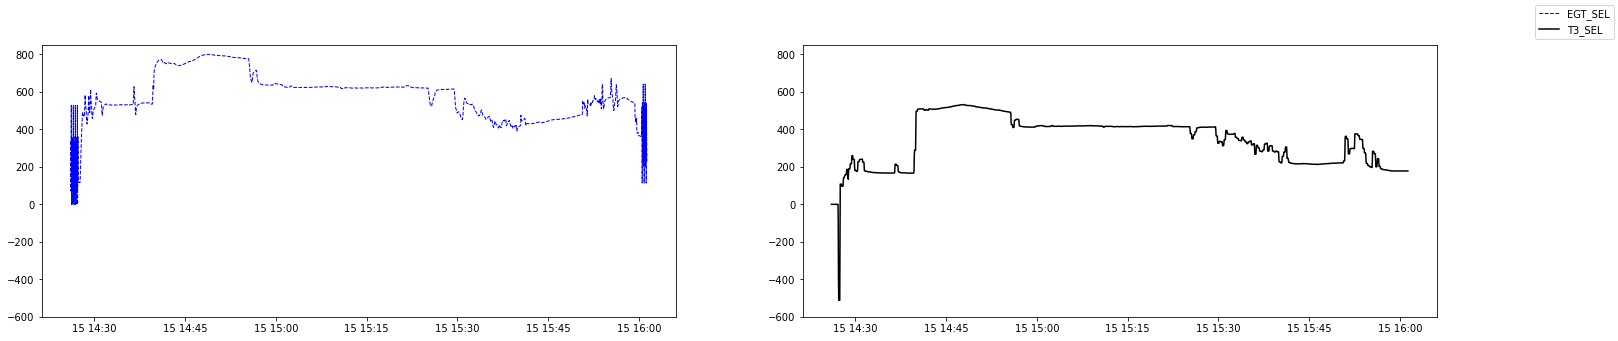

In [6]:
fig = plt.figure(figsize=(25,5))

plt.subplot(1, 2, 1)
plt.plot(vol['t'], vol['EGT_SEL'], 'b--', linewidth=1, label="EGT_SEL")
plt.ylim(-600,850)

plt.subplot(1, 2, 2)
plt.plot(vol['t'], vol['T3_SEL'], 'k-',label="T3_SEL")
plt.ylim(-600,850)
fig.legend()

### Bar plot : temps passé dans chaque phase de vol avec `plt.bar`

Pour afficher un ensemble réduit de valeurs, le diagramme le plus adapté est le bar plot. Tout d'abord, il nous faut calculer le nombre de lignes du vol par phase de vol. La phase de vol est symbolisée par la variable `FLIGHT_MOD`. On suppose la correspondance suivante :

`FLIGHT_MOD` | Phase de vol
-------------|-------------
1 | taxi
2 | take_off
3 | begin_climb
4 | climb
5 | cruise_climb
6 | cruise
7 | descent
8 | approach
9 | flare
10 | landing

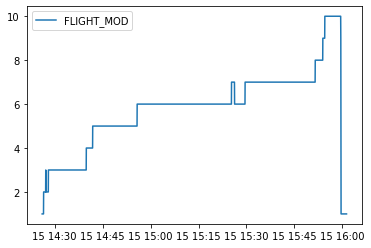

In [7]:
plt.plot(vol['t'], vol['FLIGHT_MOD'], label='FLIGHT_MOD')
plt.legend()

EXERCICE - Correpondance FLIGHT_MOD/phase de vol
1. Créez un liste définissant la correspondance FLIGHT_MOD/phase de vol
2. Ajoutez une nouvelle colonne 'FLIGHT_PHASE' au DataFrame contenant le nom de la phase. Une possibilité est d'utiliser la méthode "apply" et une fonction anonyme (lambda).

In [8]:
INDEX_phase_vol=["taxi","take_off","begin_clim","climb","cruise_climb","cruise","descent","approach","flare","landing"]

In [9]:
def func(i):
	return(INDEX_phase_vol[i-1])

vol["FLIGHT_PHASE"]=vol['FLIGHT_MOD'].apply(func)

In [10]:
vol.head()

,t,EGT_SEL,FLIGHT_MOD,FMV_SEL,HPTC_SEL,LPTC_SEL,N1_SEL,N2_ACTSEL,OIL_P,OIL_TEMP,...,T3_SEL,VBV_SEL,VIB_CN1,VIB_CN2,VIB_TN1,VIB_TN2,VSV_SEL,WFM_SEL,XM,FLIGHT_PHASE
0,2011-09-15 14:26:02.875,335.984000,1,0.0,0.0,0.0,0.0,0.0,0.000,177.3740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7679.84,0.15,taxi
1,2011-09-15 14:26:05.375,72.000600,1,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15,taxi
2,2011-09-15 14:26:07.875,72.001100,1,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15,taxi
3,2011-09-15 14:26:10.375,527.978000,1,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10752.10,0.15,taxi
4,2011-09-15 14:26:12.875,-0.001335,1,0.0,0.0,0.0,0.0,0.0,456.002,44.6249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15,taxi


EXERCICE - Calcul du nombre de lignes par phase de vol
Groupez le DataFrame par phase de vol avec groupby() et aggrégez le résultat avec size().



In [11]:
time_by_phase=vol.groupby(["FLIGHT_PHASE"]).size()

<BarContainer object of 10 artists>

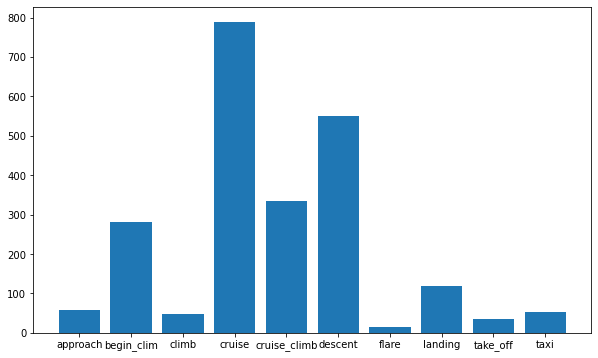

In [12]:
plt.figure(figsize=(10,6)) # la méthode figure permet de créer une nouvelle figure et de configurer ses paramètres
plt.bar(np.arange(time_by_phase.size), time_by_phase, tick_label=time_by_phase.index.tolist())

EXERCICE - Affichez la température T25 maximale par phase de vol sur un bar plot de couleur rouge.

In [13]:
T25_MAX_PHASE_VOL=vol.groupby(["FLIGHT_PHASE"])["T25_SEL"].max()

In [14]:
T25_MAX_PHASE_VOL

FLIGHT_PHASE
approach         73.5000
begin_clim       75.5000
climb           109.5000
cruise           70.5000
cruise_climb    111.0000
descent          58.0000
flare            56.7500
landing          46.7500
take_off         37.2500
taxi             35.1406
Name: T25_SEL, dtype: float64

<BarContainer object of 10 artists>

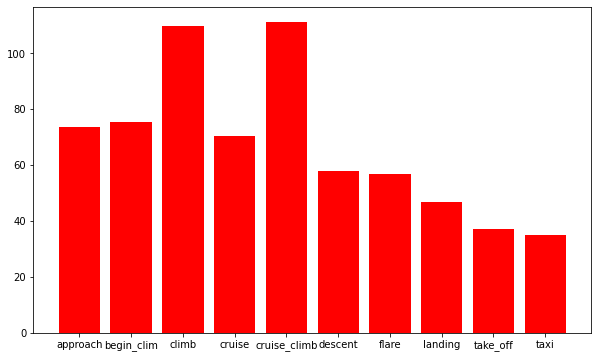

In [15]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(T25_MAX_PHASE_VOL.size), T25_MAX_PHASE_VOL, tick_label=T25_MAX_PHASE_VOL.index.tolist(),color="r")

#### 2.1. Préparation des données

Ces algorithmes requièrent des données numériques. Il faut donc éliminer du jeu de données les variables non numérique ou les transformer en variables numériques.

De plus, on essayera dans la suite de classifier les instants du vol par phase de vol en utilisant un algorithme de clustering. On élimine donc également la colonne "FLIGHT_MOD" du jeu de données.

EXERCICE - Préparation des données
1. Quelles sont les variables non numériques dans les données de vol ?
2. Supprimez ces colonnes, ainsi que le FLIGHT_MOD, et créez une variable X_vol contenant les valeurs numériques sous forme d'array numpy (on y accède via la propriété `values`).
3. Affichez les dimensions de X_vol (nombre d'individus et de variables).

In [16]:
vol.dtypes

t               datetime64[ns]
EGT_SEL                float64
FLIGHT_MOD               int64
FMV_SEL                float64
HPTC_SEL               float64
LPTC_SEL               float64
N1_SEL                 float64
N2_ACTSEL              float64
OIL_P                  float64
OIL_TEMP               float64
PS3_SEL                float64
PT2_SEL                float64
P0_SEL                 float64
TAT                    float64
TBV_SEL                float64
TRA_SEL                float64
T25_SEL                float64
T3_SEL                 float64
VBV_SEL                float64
VIB_CN1                float64
VIB_CN2                float64
VIB_TN1                float64
VIB_TN2                float64
VSV_SEL                float64
WFM_SEL                float64
XM                     float64
FLIGHT_PHASE            object
dtype: object

In [17]:
vol_float=vol.select_dtypes(include = 'float64')
vol_float.head()

,EGT_SEL,FMV_SEL,HPTC_SEL,LPTC_SEL,N1_SEL,N2_ACTSEL,OIL_P,OIL_TEMP,PS3_SEL,PT2_SEL,...,T25_SEL,T3_SEL,VBV_SEL,VIB_CN1,VIB_CN2,VIB_TN1,VIB_TN2,VSV_SEL,WFM_SEL,XM
0,335.984000,0.0,0.0,0.0,0.0,0.0,0.000,177.3740,9.599800e+02,0.0,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7679.84,0.15
1,72.000600,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,0.000000e+00,0.0,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15
2,72.001100,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,5.930390e-07,0.0,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15
3,527.978000,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,1.344020e+03,0.0,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10752.10,0.15
4,-0.001335,0.0,0.0,0.0,0.0,0.0,456.002,44.6249,0.000000e+00,0.0,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15


Création du tableau numpy avec les valeurs en float64*

In [18]:
X_VOL=vol_float.to_numpy()
print(X_VOL)
np.shape(X_VOL)

[[ 3.35984e+02  0.00000e+00  0.00000e+00 ...  0.00000e+00  7.67984e+03
   1.50000e-01]
 [ 7.20006e+01  0.00000e+00  0.00000e+00 ...  0.00000e+00  0.00000e+00
   1.50000e-01]
 [ 7.20011e+01  0.00000e+00  0.00000e+00 ...  0.00000e+00  0.00000e+00
   1.50000e-01]
 ...
 [ 5.40191e+02 -1.23750e+01  0.00000e+00 ...  0.00000e+00  7.67984e+03
   1.50000e-01]
 [ 3.21570e+02 -1.23750e+01  0.00000e+00 ...  0.00000e+00  0.00000e+00
   1.50000e-01]
 [ 2.30825e+02 -1.23750e+01  0.00000e+00 ...  0.00000e+00  0.00000e+00
   1.50000e-01]]


(2283, 24)

Ensuite, il est nécessaire en analyse de données de normaliser nos données, car les différentes variables peuvent avoir des unités et plages de valeurs très différentes les unes des autres. Par exemple, certaines variables varient entre 0 et 1, d'autre, comme les températures, peuvent varier (en gros) de 0 à 1000. Pour pouvoir les rendre comparables, on utilisera la normalisation standard suivante, appelée _standardisation_ :

1. Retrait de la moyenne de chaque variable.
2. Division par l'écart-type.

Cela permet d'obtenir des variables de moyenne nulle et d'écart-type 1. Il existe bien entendu des normalisations bien plus poussées.

EXERCICE - Standardisation
1. Normalisez le jeu de donnée X_vol comme expliqué précédemment, et stockez le résultat dans une variable X_vol_norm.
   Pour cela, utilisez les méthodes mean() et std() de numpy, en prenant garde à calculer selon les bonnes dimensions.
2. Véfifiez à la fin que X_vol_norm a bien une moyenne nulle et un écart-type égal à 1 pour toutes les variables.
3. Que renvoie `(X_vol_norm.mean(axis=0) == 0).all()` ? Pourquoi à votre avis ? Pour pailler à ce problème, documentez-vous et utilisez la méthode `np.isclose` de numpy 
   pour effectuer cette vérification.

In [19]:
X_VOL_norm=(X_VOL-np.mean(X_VOL,axis=0))/np.std(X_VOL-np.mean(X_VOL,axis=0))
X_VOL_norm

array([[-6.20744000e-01, -7.08752884e-02, -1.39521863e-01, ...,
        -2.76640620e-02,  1.32938527e+01, -9.77892023e-04],
       [-1.29001921e+00, -7.08752884e-02, -1.39521863e-01, ...,
        -2.76640620e-02, -6.17679021e+00, -9.77892023e-04],
       [-1.29001794e+00, -7.08752884e-02, -1.39521863e-01, ...,
        -2.76640620e-02, -6.17679021e+00, -9.77892023e-04],
       ...,
       [-1.03019466e-01, -1.02249537e-01, -1.39521863e-01, ...,
        -2.76640620e-02,  1.32938527e+01, -9.77892023e-04],
       [-6.57287710e-01, -1.02249537e-01, -1.39521863e-01, ...,
        -2.76640620e-02, -6.17679021e+00, -9.77892023e-04],
       [-8.87352854e-01, -1.02249537e-01, -1.39521863e-01, ...,
        -2.76640620e-02, -6.17679021e+00, -9.77892023e-04]])

In [20]:
# VErification de la normalisation
print(np.std(X_VOL_norm))
print((X_VOL_norm.mean(axis=0) == 0).all())
# Surement a cause d'erreur d'arrondie/ précision machine
print(np.isclose(X_VOL_norm.mean(axis=0),0))
#AFFICHE que des trues donc c'est bon

1.0
False
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


On ne ré-invente pas la roue : scikit-learn propose déjà un ensemble de méthodes de normalisation dans son module de prétraitement, `sklearn.preprocessing`.

In [21]:
from sklearn.preprocessing import StandardScaler
X_VOL_NORM2 = StandardScaler().fit_transform(X_VOL)

EXERCICE - La résultat est-il bien identique ?

In [22]:
np.isclose(X_VOL_norm,X_VOL_NORM2)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

#### 2.2. PCA

In [23]:
from sklearn.decomposition import PCA

In [24]:
vol_pca = PCA(n_components=2).fit(X_VOL_NORM2)

#### 2.2.1. Étude de la variance expliquée

Le modèle PCA permet d'obtenir la part de variance des données expliquée par les différentes CP. En général, on garde autant de CP que nécessaire pour expliquer au total par exemple 90% ou 95% de la variance des données, afin de limiter la perte d'information. Ici, on en conserve 2 pour des raisons de visualisation.

EXERCICE - Étude de la variance expliquée
1. Affichez les parts de variance expliquées par les 2 premières CP à l'aide de la propriété `explained_variance_ratio_` du modèle PCA. Faites varier le nombres de CP (3, 4... 25).
   Affichez les résultats en %.
2. Quel est le pourcentage de variance expliquée par les 2 premières CP ? Est-il cohérent de ne conserver que ces 2 dimensions ?
   Combien de composantes faudrait-il garder pour expliquer 90% de la variance ? 95% ?
3. Tracez un bar plot de la variance expliquée par chaque CP, en n'oubliant pas le titre, les noms des axes et les étiquettes sur l'axe des abscisses ('PC1', 'PC2', etc.).
   Essayez avec une échelle logarithmique

In [25]:
PCA_ind=[3,4,7,9,15,23]

In [26]:
label=[ "PCA"+str(i)for i in PCA_ind]

[0.783613898935122, 0.831618565305446, 0.9196129130506464, 0.9495820569657677, 0.9884706075908809, 0.9999062892479814]


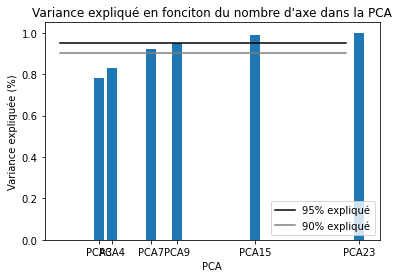

In [27]:
pourcentage=[]
for i in PCA_ind:
	vol_pca = PCA(n_components=i).fit(X_VOL_NORM2)
	pourcentage.append(vol_pca.explained_variance_ratio_.sum())
plt.bar(PCA_ind,pourcentage)
plt.plot([0.95]*max(PCA_ind),color="black",label="95% expliqué")
plt.plot([0.90]*max(PCA_ind),color="grey",label="90% expliqué")
plt.title("Variance expliqué en fonciton du nombre d'axe dans la PCA")
plt.xlabel("PCA")
plt.xticks(PCA_ind,label)
plt.ylabel("Variance expliquée (%)")
plt.legend()
#plt.yscale('log')
print(pourcentage)


On remarque que seulement deux composantes principales servent à expliquer 71% de la variance des données, si on veut 90% d'explication il faut prendre 7 Axes, et 9 pour 95%

#### 2.2.2. Projection et visualisation

À présent, on projette les données sur les 2 premières CP pour les visualiser sur un scatter plot. La projection s'effectue :

* par produit matriciel avec les composantes principales, contenues dans l'array `vol_pca.components_`
* via la méthode `transform(...)` du modèle PCA

EXERCICE - Projection et visualisation par PCA.
1. Projettez les données sur les 2 premières CP.
2. Affichez le résultat sur un scatter plot. Que représente chaque point ? Que représentent les axes ? 
3. Étant donné que notre jeu de données est une série temporelle, il serait intéressant de visualiser la trajectoire du vol dans le plan de la PCA.
   Proposez et mettez en œuvre une solution permettant de visualiser cet aspect temporel sur le scatter plot.

In [28]:
vol_pca = PCA(n_components=2).fit(X_VOL_NORM2)
y=vol_pca.transform(X_VOL_NORM2)[:,1]
x=vol_pca.transform(X_VOL_NORM2)[:,0]

In [29]:
phase_vol=vol["FLIGHT_MOD"].to_numpy()

EXERCICE - Projection et visualisation par PCA avec affichage de la phase de vol.
Complétez le code matplotlib suivant afin de de colorer les points par phase de vol, avec une légende.

No handles with labels found to put in legend.


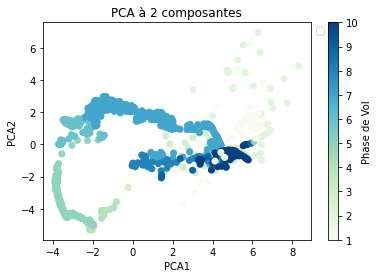

In [44]:
plt.scatter(x,y,c=phase_vol,cmap="GnBu")
plt.title("PCA à 2 composantes")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label="Phase de Vol")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


EXERCICE - Projection et visualisation par PCA avec affichage de la phase de vol.
Complétez le code matplotlib suivant afin de de colorer les points par phase de vol, avec une légende.

#### 2.3. $k$-means

L'algorithme $k$-means est disponible dans le module `sklearn.cluster`, au côté d'autres algorithmes de clustering. 

In [31]:
from sklearn.cluster import KMeans

#### 2.3.1. Apprentissage et visualisation des résultats

EXERCICE - k-means clustering
1. Instanciez un modèle k-means avec 10 centroïdes.
2. Apprenez le modèle sur le jeu de données `X_vol_norm` et récupérez les étiquettes des clusters via la méthode de prédiction.
3. Créez une figure composée de 2 graphiques.
       3.1. Sur le graphique 1, affichez le nombre d'éléments par cluster sur un bar plot (indice : la méthode `bincount` de nummy évitera d'écrire une boucle).
        3.2. SUr le graphique 2, affichez un scatter plot de la projection PCA en colorant les points par cluster.
4. Interprétez le résultat. Peut-on établir une correspondance entre les clusters trouvés par k-means et les phases de vol ?

In [32]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_VOL_NORM2)

In [33]:
prediction=kmeans.predict(X_VOL_NORM2)

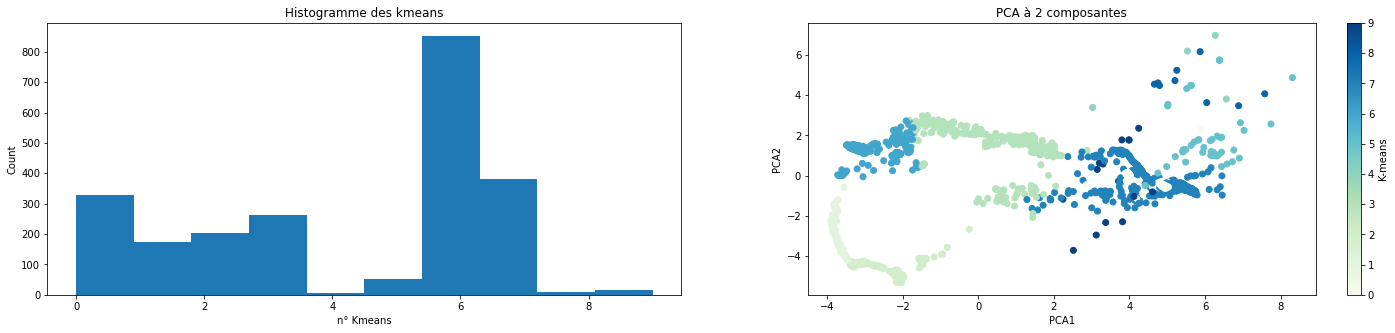

In [34]:
plt.figure(figsize=(25,5))

plt.subplot(1,2,1)
plt.hist(prediction)
plt.title("Histogramme des kmeans")
plt.ylabel("Count")
plt.xlabel("n° Kmeans")

plt.subplot(1,2,2)
plt.scatter(x,y,c=prediction,cmap="GnBu")
plt.title("PCA à 2 composantes")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label="K-means")


plt.show()

On remarque que les clusters des k-means sont sensiblement les mêmes que ceux des phases de vol dans le graphique ci dessus. Donc les phases de vols est le meilleur moyen de classer les données.

#### 2.3.2. Calcul de la pureté du clustering

On souhaite maintenant répondre plus en détail à la question :
    
> Peut-on établir une correspondance entre les clusters trouvés par k-means et les phases de vol ?

On commence par évaluer la capacité de notre modèle à trouver des clusters **homogènes par rapport à une variable cible**. Ici, notre variable cible sera la phase de vol. On cherche donc à mesurer si les clusters contiennent des points appartenant à une même phase de vol. Pour cela, on utilise un **indice de qualité de clustering** appelé **pureté** (_purity_). 

La pureté se calcule de la manière suivante :

1. On associe à tous les points d'un cluster la classe (i.e. la variable cible) la plus fréquente au sein de ce cluster.
2. On divise le nombre de points correctement associés à leur cluster par le nombre total de points.

Pour un partitionnement $\mathbf{Q} = \{Q_k\}, k = 1 \ldots K$ et en notant $\mathbf{Y} = \{Y_j\}, j = 1 \ldots C$ l'ensemble des points appartenant à chaque classe, on a :
\begin{equation}
    purity(\mathbf{Q}, \mathbf{Y}) = \frac{1}{N} \sum_{k=1}^K \underset{j = 1 \ldots C}{\max} |Q_k \cap Y_j|
\end{equation}

EXERCICE - Calcul de la pureté
1. Implémentez une fonction calculant la pureté d'un clustering à partir des labels et des valeurs de la variable cible. 
2. Quelle est la pureté du modèle avec 10 clusters ?

In [35]:
df = pd.DataFrame({'Flight_mod':vol["FLIGHT_MOD"] ,
                   'k_means':prediction})

In [36]:
d_group=df.groupby('k_means').groupby

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

In [ ]:
for cluster_n in range(1,len(prediction)):
	df.loc[:, ['Flight_mod', 'k_means']].groupby('Flight_mod').count()

,k_means
Flight_mod,
1,53
2,35
3,281
4,48
5,335
6,788
7,550
8,57
9,16


In [ ]:
# On rajoute la colonne prediction, puis groupby puis mode sur la colonne de phase de vol puis on compte
def cluster_purity(labels, targets):
    sum=0
    N=len()
    for k in range(K):
        print("")

    return(sum/N)

pur = cluster_purity(prediction,vol['FLIGHT_MOD'])
print('Pureté : {:f} %'.format(pur*100))

TypeError: len() takes exactly one argument (0 given)

EXERCICE - Effet du nombre de clusters sur la pureté
1. Faites varier le nombre de clusters de k-means. Quel est l'effet sur la pureté ?
2. Tracez la pureté en fonction du nombre de clusters pour quelques valeurs de ce nombre (par exemple K=1, 2, 3, 5, 10, 20, 30, 50).
3. Quelle est, à votre avis, la "meilleure" valeur de K ? Que peut-on en conclure ?

In [ ]:
K=[1,2,3,5,10,20,30,50]
purete=[]
for k in K:
	kmeans = KMeans(n_clusters=k, random_state=0).fit(X_VOL_NORM2)
	prediction=kmeans.predict(X_VOL_NORM2)
	purete.append(cluster_purity(prediction,vol['FLIGHT_MOD']))

plt.plot(K,purete,label="pureté")
plt.xlabel("Nbr cluster")
plt.ylabel("pureté")
plt.title("Courbe de pureté pour k-means sur les phases de vol")

#### 2.3.3. Calcul de la précision de classification non supervisée (_unsupervised clustering accuracy_)

Enfin, on souhaite évaluer la performance de notre modèle en tant que classificateur.

**Note** : cette approche n'a de sens que si le nombre de clusters est égal au nombre de classes de la variable cible !

Pour ce faire, nous allons passer par une métrique appelée **unsupervised clustering accuracy**. Celle-ci correspond à la précision de classification (i.e. proportion de points correctement classifiés), mais dans un cadre non supervisé. Cette métrique mesure la capacité à partitionner les données selon les différentes modalités d'une variable cible. La question est donc de mesurer la capacité du modèle $k$-means à partitionner les données selon la phase de vol.

Cette métrique s'écrit :
\begin{equation}
    acc(\mathbf{Q}, \mathbf{Y}) = \frac{1}{N} \underset{m}\max \sum_{k=1}^K |Q_k \cap Y_{m(k)}|
\end{equation}

où on cherche la meilleure association $m$ (_mapping_) deux à deux entre clusters et classes (dans notre cas, l'association entre Cluster 0, Cluster 1, etc. et les phases de vol taxi, take_off, etc.).

Pour calculer cette meilleur association, un algorithme efficace est la _méthode Hongroise_ ou algorithme de Kuhn-Munkres. Celui-ci est disponible dans le module de scipy `scipy.optimize.linear_sum_assignment`.

In [ ]:
from scipy.optimize import linear_sum_assignment

In [ ]:
def cluster_acc(labels, targets):
    assert labels.size == targets.size
    D = max(labels.max(), targets.max()) + 1
    w = np.zeros((D, D))
    for i in range(labels.size):
        w[labels[i], targets[i]] += 1
    row_ind, col_ind = linear_sum_assignment(w.max() - w)
    return w[row_ind, col_ind].sum() * 1.0 / labels.size

acc = cluster_acc(prediction, vol['FLIGHT_MOD'])
print('Accuracy : {:f} %'.format(acc*100))

NameError: name 'prediction' is not defined

#### Test Khi-2

Découvrir la library scipy pour effectuer le test de chi-deux d'indépendance des variables dans un tableau de contingence.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

scipy.stats.chi2_contingency : fonction permet de calculer le score de khi-2 et la p-value pour le test d'hypothèse d'indépendance des fréquences observées. 